## Decriptive Statistics

<b> So what is descriptive statistics?</b><br>
Descriptive statistics is used to describe or summarize data in a ways that it is meaningful and useful. Descriptive statistics is at the heart of all quantitative analysis.

<b>So how do we describe data?</b><br>
There are two ways: measures of central tendency and measures of variability, or dispersion.

<b>How this code is going to help to summarize descriptive statistics for my data?</b><br>
This code would provide the descriptive statistics for any input data which is CSV or excel format.<br>
Just set the value of <b>"file_name"</b> variable in _Step 2_

<b>How the output of this code going to help me?</b><br>
_Step 4_ would help to give:
* probable type of variable
* amount of missing data
* measures of central tendency
* measures of variability
* unique values

<b>Does this code provides any kind of plots of variables?</b><br>
Yes, this provides different types of plot of different variables<br>
_Step 5_ provides count plot for categorical variables<br>
_Step 6_ provides count plot for binary variables<br>
_Step 5_ provides boxplot for numerical variables

<b><u>Step 1</u>: Import libraries</b>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt
# check what the character encoding might be
import chardet

%matplotlib inline
sns.set(style="whitegrid")

<b><u>Step 2</u>: Load data</b>

In [2]:
file_name = "raw_data.csv"

np.random.seed(7)

# look at the first ten thousand bytes to guess the character encoding
with open(file_name, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
# print(result)

file_encoding = result.get('encoding')

if "csv" in file_name:
    dataframe = pd.read_csv(file_name, encoding=file_encoding)
elif "xls" in file_name:
    dataframe = pd.read_excel(file_name, encoding=file_encoding)
else:
    print("Check file extension")
    
print(dataframe.shape)
# dataframe.head()

(1000, 32)


<b><u>Step 3</u>: Calculate Description Statistics</b>

In [3]:
# Average, Max, Min, Range, Mean, Median, Stdev, Unique, Type
desc_stat = pd.DataFrame(dataframe.mean())
desc_stat.index.names = ['Variables']
desc_stat.rename(columns={0:'Mean'}, inplace=True)

max_df = pd.DataFrame(dataframe.max())
max_df.index.names = ['Variables']
max_df.rename(columns={0:'Max'}, inplace=True)

# Min
min_df = pd.DataFrame(dataframe.min())
min_df.index.names = ['Variables']
min_df.rename(columns={0:'Min'}, inplace=True)

# Median
median_df = pd.DataFrame(dataframe.median())
median_df.index.names = ['Variables']
median_df.rename(columns={0:'Median'}, inplace=True)

# Std
std_df = pd.DataFrame(dataframe.std())
std_df.index.names = ['Variables']
std_df.rename(columns={0:'Std'}, inplace=True)

# Nunique
nunique_df = pd.DataFrame(dataframe.nunique())
nunique_df.index.names = ['Variables']
nunique_df.rename(columns={0:'Unique'}, inplace=True)

# Missing or NaN values
missing_df = pd.DataFrame(dataframe.isnull().sum())
missing_df.index.names = ['Variables']
missing_df.rename(columns={0:'Missing'}, inplace=True)

In [4]:
final_df = pd.concat([desc_stat, min_df, max_df, median_df, std_df, nunique_df, missing_df], axis=1, sort=False)
final_df['Range']=final_df[['Max','Min']].apply(pd.to_numeric, errors='coerce').fillna(0).eval('Max-Min')
final_df['Percent_Missing'] = final_df['Missing'] * 100 / dataframe.shape[0]
# Set default value for Probable_Type
final_df['Probable_Type'] = 'Undecided'
# Rearrange the column order
final_df = final_df[['Probable_Type', 'Missing', 'Percent_Missing', 'Min', 'Median', 'Max', 'Range', 'Mean', 'Std', 'Unique']]

In [5]:
def set_variable_type():
    for column_name in dataframe.columns:
        unique_count = final_df.loc[column_name, 'Unique']

        if(dataframe[column_name].dtype == 'object'):
            final_df.loc[column_name,'Probable_Type'] = 'String'
        if(dataframe[column_name].dtype == 'int64' or dataframe[column_name].dtype == 'float64'):
            final_df.loc[column_name,'Probable_Type'] = 'Numeric'
        if(unique_count == dataframe.shape[0]):
            final_df.loc[column_name,'Probable_Type'] = 'Unique Identifier'
        if(unique_count <= 15):
            final_df.loc[column_name,'Probable_Type'] = 'Categorical'
        if(dataframe[column_name].isin([0,1]).all() == True):
            final_df.loc[column_name,'Probable_Type'] = 'Binary'
        if(dataframe[column_name].dtype == 'object'):
            if(dataframe[column_name].str.lower().isin([x.lower() for x in ['y', 'n']]).all() == True
               or dataframe[column_name].str.lower().isin([x.lower() for x in ['yes', 'no']]).all() == True):
                final_df.loc[column_name,'Probable_Type'] = 'Binary'
        if(dataframe[column_name].dtype == 'object'):
            try:
                sample_value = dataframe.get_value(0, column_name)
                check_error = pd.Timestamp(sample_value)
                final_df.loc[column_name,'Probable_Type'] = 'Datetime'
            except:
                    check_error = "Do nothing"
set_variable_type()

<b><u>Step 4</u>: Output</b>

In [6]:
print("Total Rows        : "+str(dataframe.shape[0]))
print("Total Variables   : "+str(dataframe.shape[1]))
final_df.round(2)

Total Rows        : 1000
Total Variables   : 32


,Probable_Type,Missing,Percent_Missing,Min,Median,Max,Range,Mean,Std,Unique
Variables,,,,,,,,,,
OBS#,Unique Identifier,0,0.0,1,500.5,1000,999,500.50,288.82,1000
CHK_ACCT,Categorical,0,0.0,0,1.0,3,3,1.58,1.26,4
DURATION,Numeric,0,0.0,4,18.0,72,68,20.90,12.06,33
HISTORY,Categorical,0,0.0,0,2.0,4,4,2.54,1.08,5
NEW_CAR,Binary,0,0.0,0,0.0,1,1,0.23,0.42,2
USED_CAR,Binary,0,0.0,0,0.0,1,1,0.10,0.30,2
FURNITURE,Binary,0,0.0,0,0.0,1,1,0.18,0.39,2
RADIO/TV,Binary,0,0.0,0,0.0,1,1,0.28,0.45,2
EDUCATION,Binary,0,0.0,0,0.0,1,1,0.05,0.22,2


In [7]:
def assign_percent(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)

In [8]:
from math import ceil

def plot_countplot(variable_type):
    
    plot_per_row = 3

    number_of_plots = final_df[final_df['Probable_Type'] == variable_type].shape[0]
    number_of_rows = ceil(number_of_plots / plot_per_row)


    number_of_plots = final_df[final_df['Probable_Type'] == variable_type].shape[0]
    fig, axs = plt.subplots(nrows=number_of_rows, ncols=plot_per_row, figsize=(7*plot_per_row, 7*number_of_rows), constrained_layout=True)

    ii, jj = 0, 0
    for index, row in final_df[final_df['Probable_Type'] == variable_type].iterrows():
        plot = sns.countplot(x=index, data=dataframe, ax=axs[ii][jj])
        plot.set_title(index, size=18)
        assign_percent(plot, dataframe[index])
        jj = jj + 1
        if(jj == plot_per_row):
            jj = 0
            ii = ii + 1

    fig.suptitle('Histogram for '+ variable_type +' variables', size=25)

In [9]:
from math import ceil

def plot_boxplot(variable_type):
    
    plot_per_row = 3

    fig = plt.figure(figsize=(10, 10))
    number_of_plots = final_df[final_df['Probable_Type'] == variable_type].shape[0]
    number_of_rows = ceil(number_of_plots / plot_per_row)

    grid = plt.GridSpec(number_of_rows, plot_per_row, hspace=0.2, wspace=0.2)

    ii, jj = 0, 0
    for index, row in final_df[final_df['Probable_Type'] == variable_type].iterrows():
        fig.add_subplot(grid[ii, jj]).boxplot(dataframe[index])
        plt.gca().set_title(index)
        jj = jj + 1
        if(jj == plot_per_row):
            jj = 0
            ii = ii + 1
    fig.suptitle('Boxplot for '+variable_type+' variables', size=25)
    plt.show()

<b><u>Step 5</u>: Count plot for categorical variables<b>

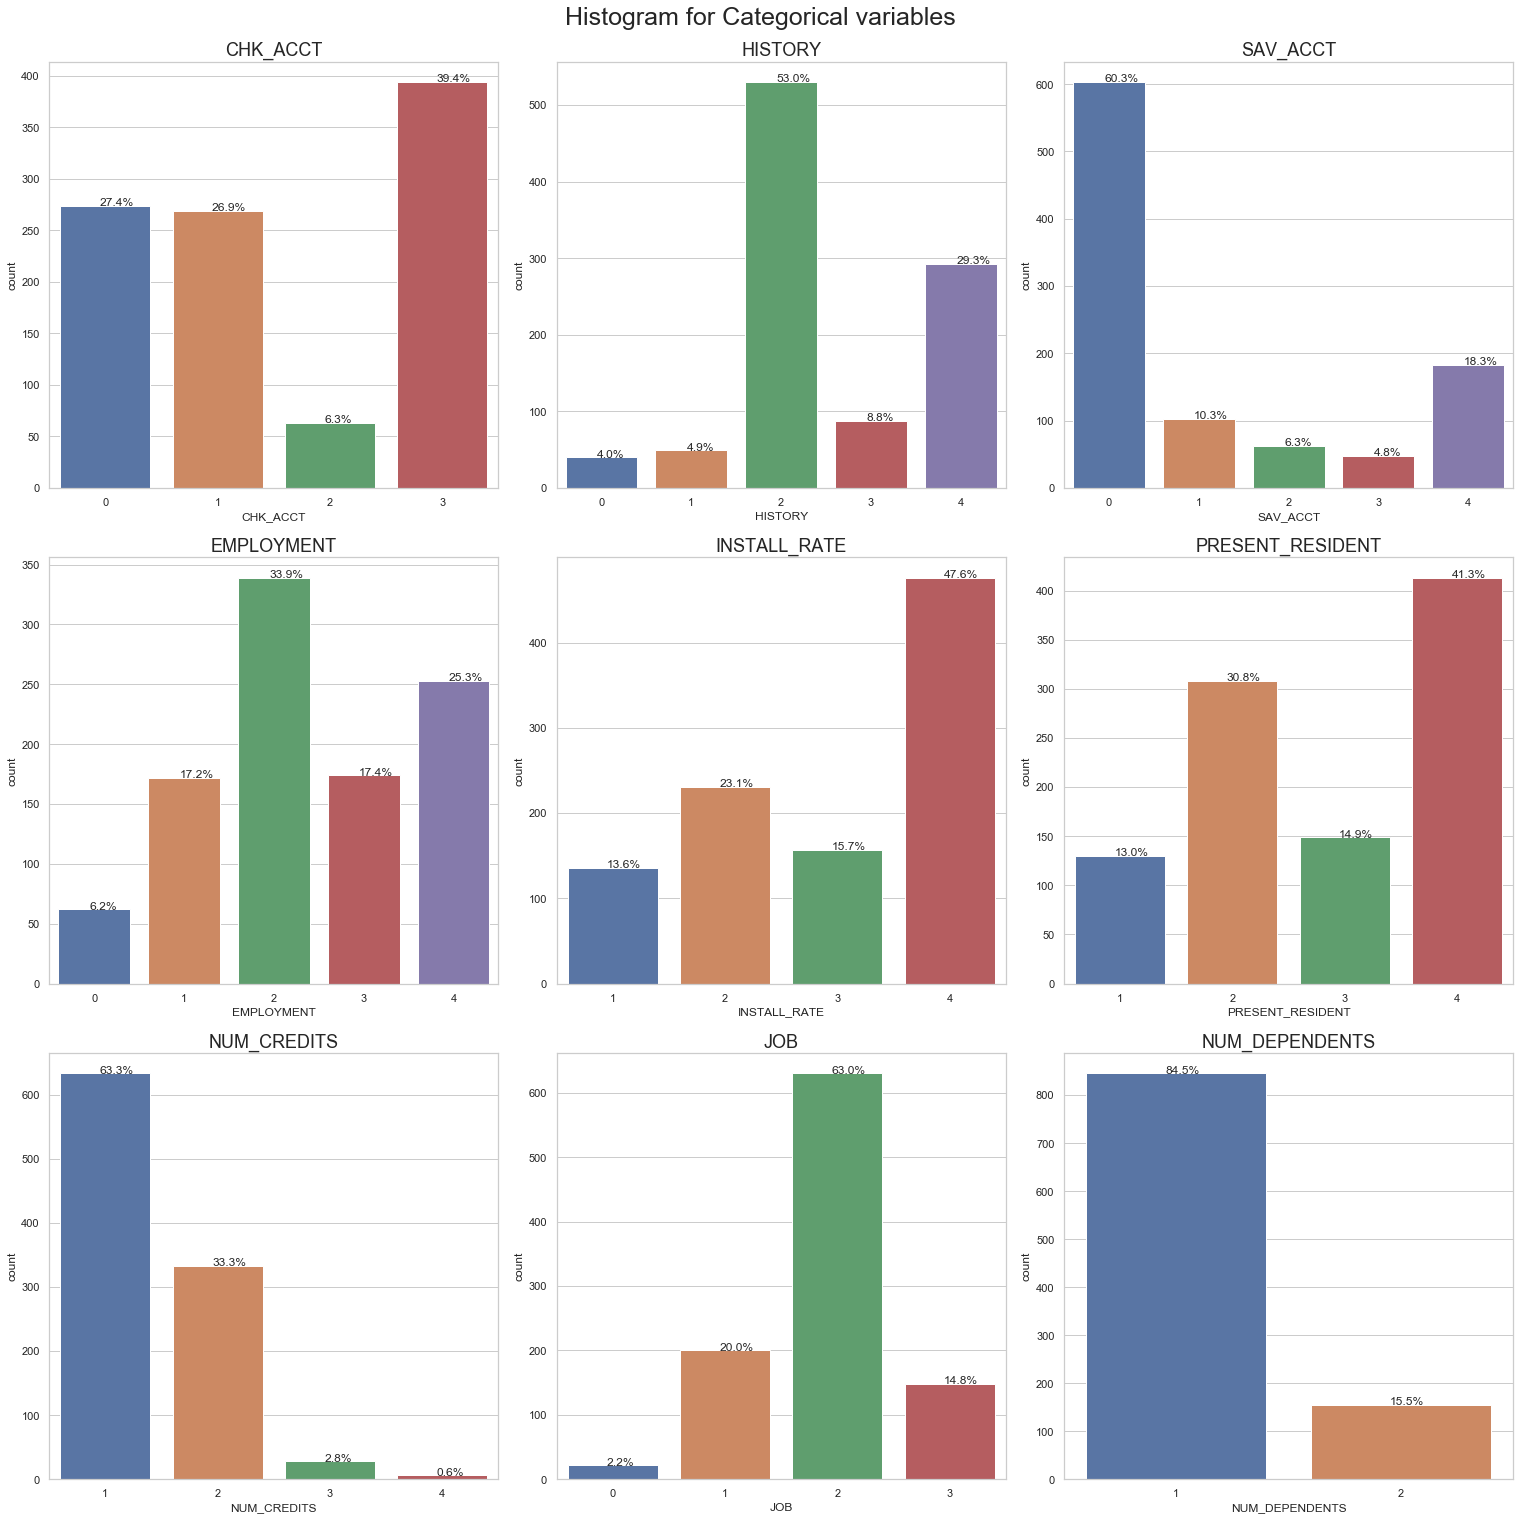

In [10]:
# Countplot for categorical variables

variable_type = 'Categorical'
plot_countplot(variable_type)

<b><u>Step 6</u>: Count plot for binary variables<b>

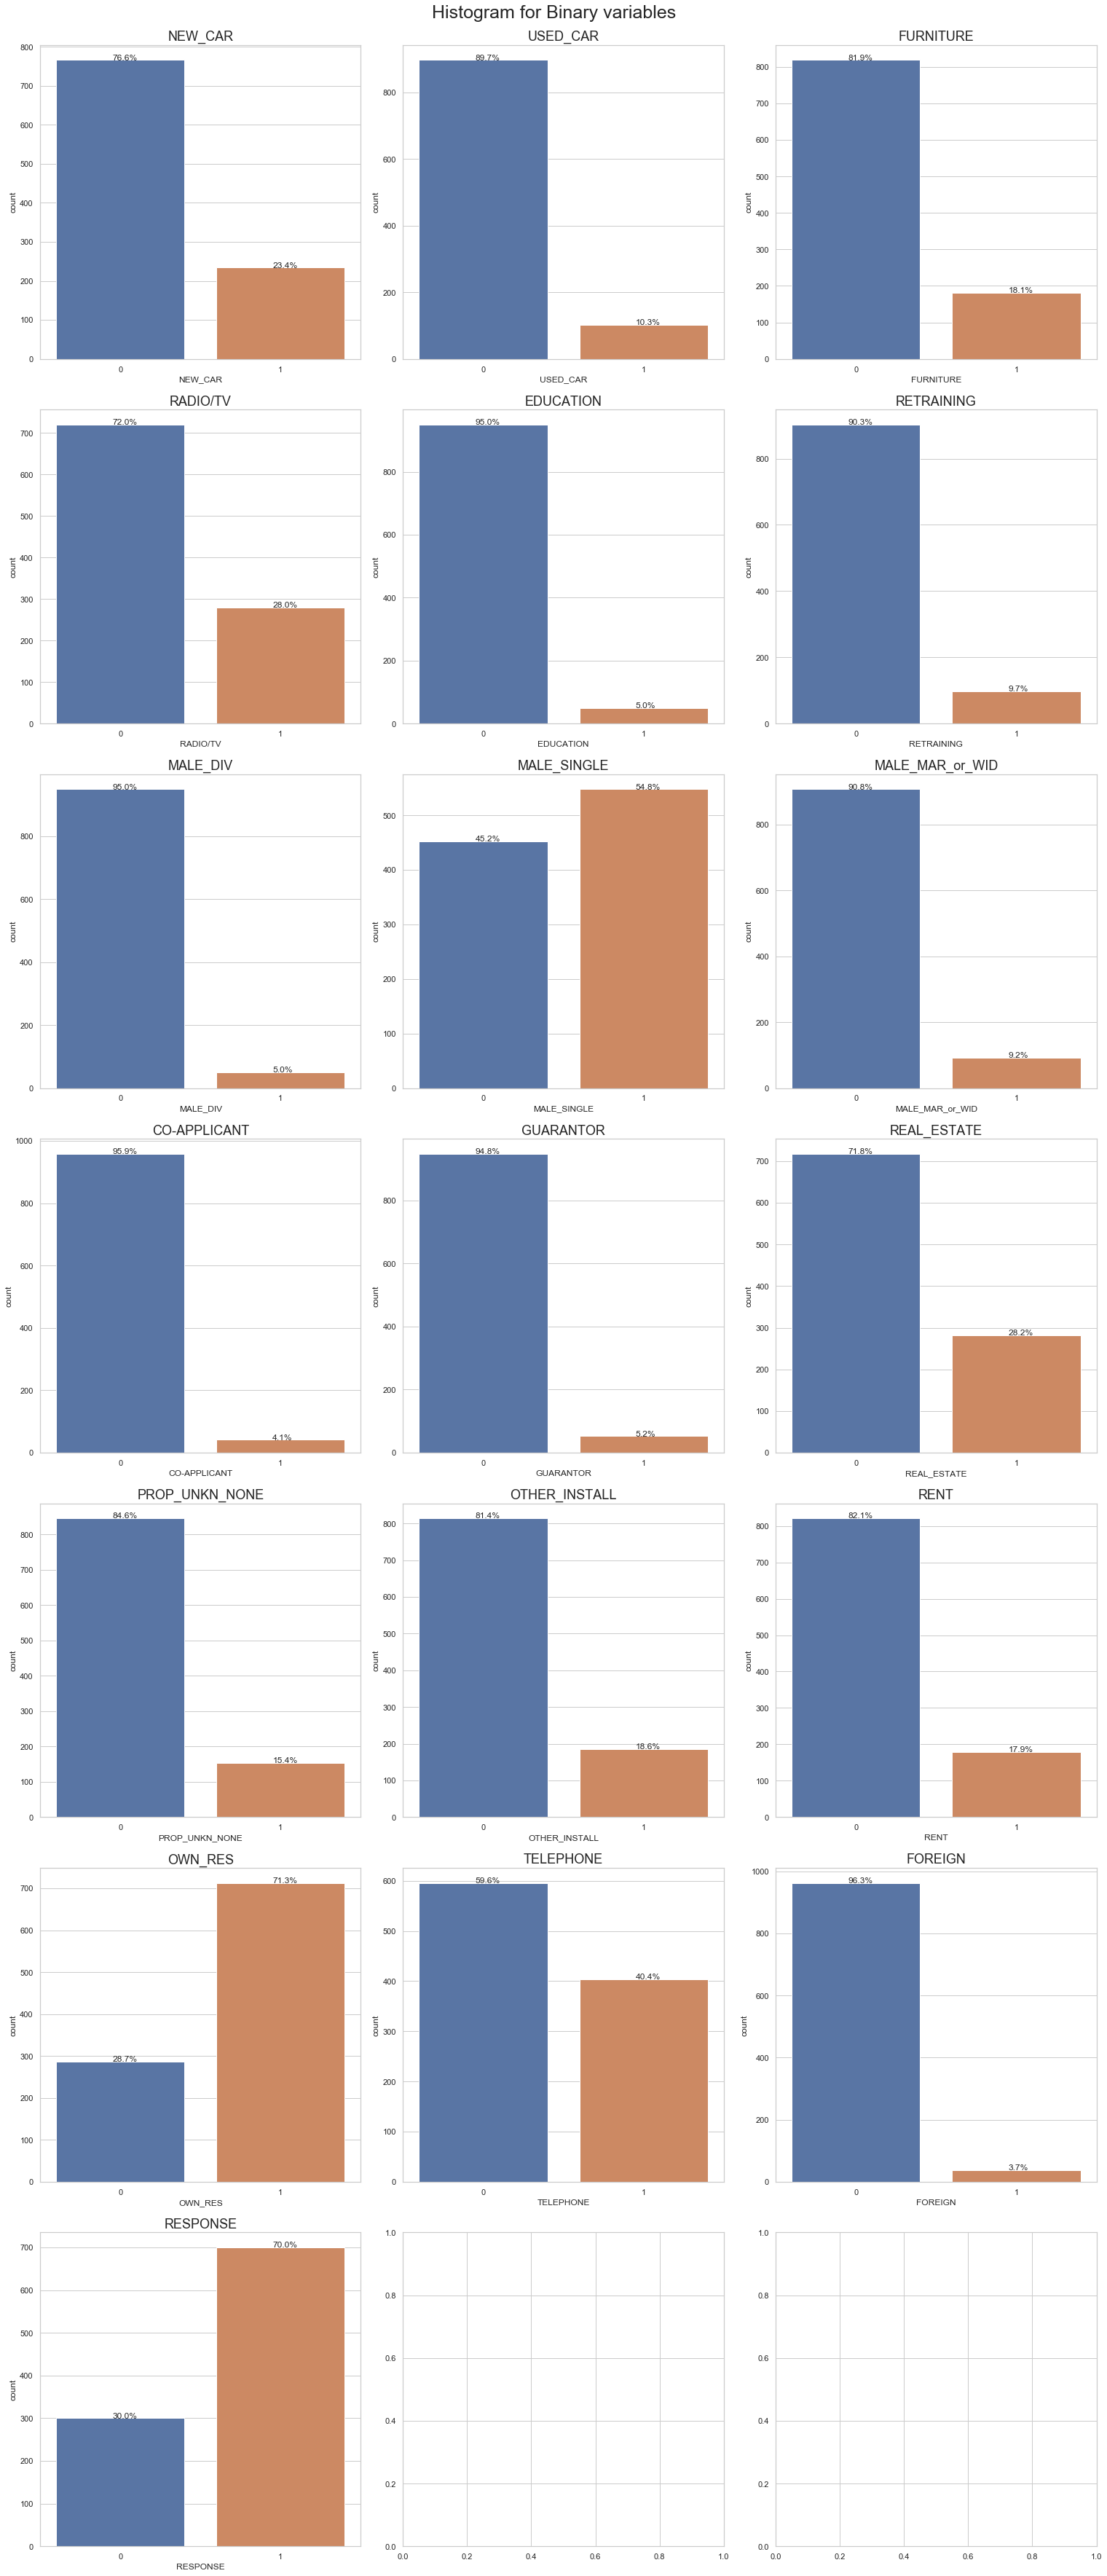

In [11]:
# Countplot for binary variables

variable_type = 'Binary'
plot_countplot(variable_type)

<b><u>Step 7</u>: Boxplot for numeric variables<b>

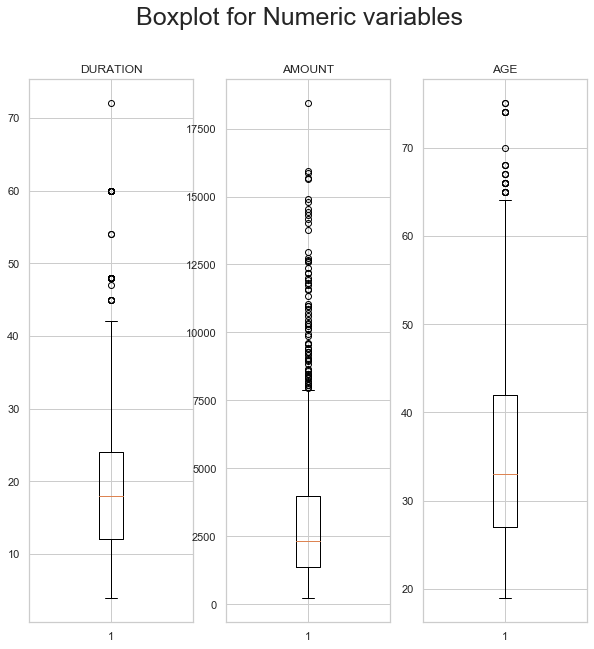

In [12]:
# Boxplot for numeric variables
variable_type = 'Numeric'
plot_boxplot(variable_type)